In [1]:
import pandas as pd
import numpy as np

In [2]:
def csv_read(p_path):
    p_data=np.array(pd.read_csv(p_path, sep=','))
    print('data.shape',p_data.shape)
    return p_data

In [3]:
with open('./File_title_info.md') as f:
    lines = f.readlines()
    
line_dict={}
for lines_i in lines:
    order=lines_i.split("_")[0]
    name=lines_i.split("#")[4]  
    line_dict[order]=name

In [4]:
line_dict

{'1': "r'{?}$\\leadsto${?}'\n",
 '2': "r'{?}$\\leadsto${?}'\n",
 '3': "r'{1}$\\leadsto${2}'\n",
 '4': "r'{2}$\\leadsto${3}'\n",
 '5': "r'{?}$\\leadsto${?}'\n",
 '6': "r'{?}$\\leadsto${?}'\n",
 '7': "r'{?}$\\leadsto${?}'\n",
 '8': "r'{1}$\\leadsto${2}'\n",
 '9': "r'{2}$\\leadsto${3}'\n",
 '10': "r'{?}$\\leadsto${?}'\n",
 '11': "r'{?}$\\leadsto${?}'\n",
 '12': "r'{?}$\\leadsto${?}'\n",
 '13': "r'{?}$\\leadsto${?}'\n",
 '14': "r'{?}$\\leadsto${?}'\n",
 '15': "r'{?}$\\leadsto${?}'\n",
 '16': "r'{?}$\\leadsto${?}'\n",
 '17': "r'{?}$\\leadsto${?}'\n",
 '18': "r'{?}$\\leadsto${?}'\n",
 '19': "r'{?}$\\leadsto${?}'\n",
 '20': "r'{?}$\\leadsto${?}'\n",
 '21': "r'{?}$\\leadsto${?}'\n",
 '22': "r'{?}$\\leadsto${?}'\n",
 '23': "r'{?}$\\leadsto${?}'\n",
 '24': "r'{?}$\\leadsto${?}'\n",
 '25': "r'{0, 0.5}$\\leadsto${1}'\n",
 '26': "r'{?}$\\leadsto${?}'\n",
 '27': "r'{1}$\\leadsto${3}'\n",
 '28': "r'{?}$\\leadsto${?}'\n",
 '29': "r'{?}$\\leadsto${?}'\n",
 '30': "r'{?}$\\leadsto${?}'\n",
 '31': "r'{?}$

In [5]:
file_name_1=35
file_name_2=41

path1='./'+str(file_name_1)+'/data/survival_data_filtered_3.csv'
path2='./'+str(file_name_2)+'/data/survival_data_filtered_3.csv'

In [6]:
data1=csv_read(path1)
used_samples_index1=np.where(data1[:,1]!=1)[0]
T1 = data1[used_samples_index1,-2]
E1 = data1[used_samples_index1,-1]

data.shape (559, 245)


In [7]:
np.sum(data1[used_samples_index1,-1]==True)

286

In [8]:
np.sum(data1[used_samples_index1,-1]==False)

120

In [9]:
data2=csv_read(path2)
used_samples_index2=np.where(data2[:,1]!=1)[0]
T2 = data2[used_samples_index2,-2]
E2 = data2[used_samples_index2,-1]

data.shape (88, 246)


In [10]:
np.sum(data2[used_samples_index2,-1]==True)

42

In [11]:
np.sum(data2[used_samples_index2,-1]==False)

19

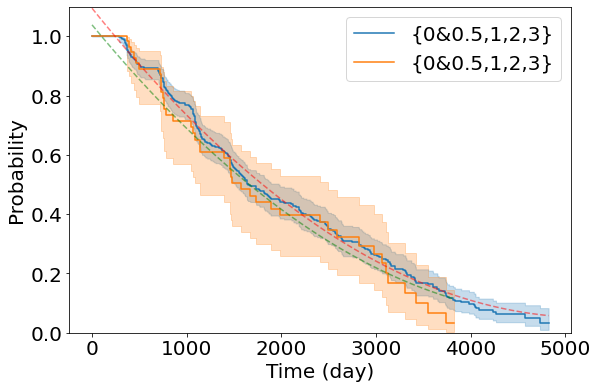

In [12]:
# import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

plt.figure(figsize=(9,6))

ax = plt.subplot(111)

kmf1 = KaplanMeierFitter()
curver1=kmf1.fit(T1.astype(float), event_observed=E1.astype(bool),  label=eval(line_dict[str(file_name_1)]))
ax = kmf1.plot_survival_function(ax=ax)

kmf2 = KaplanMeierFitter()
curver2=kmf2.fit(T2.astype(float), event_observed=E2.astype(bool), label=eval(line_dict[str(file_name_2)]))
ax = kmf2.plot_survival_function(ax=ax)

times=2
curver1_x=curver1.timeline
curver1_y=0.5*(np.array(curver1.confidence_interval_survival_function_)[:,0]+np.array(curver1.confidence_interval_survival_function_)[:,1])
linear_model1=np.polyfit(curver1_x,curver1_y,times)
linear_model1_fn=np.poly1d(linear_model1)
x_s1=np.arange(np.min(T1.astype(float)),np.max(T1.astype(float)))
plt.plot(x_s1,linear_model1_fn(x_s1),color="red",linestyle='--',alpha=0.5)

curver2_x=curver2.timeline
curver2_y=0.5*(np.array(curver2.confidence_interval_survival_function_)[:,0]+np.array(curver2.confidence_interval_survival_function_)[:,1])

linear_model2=np.polyfit(curver2_x,curver2_y,times)
linear_model2_fn=np.poly1d(linear_model2)
x_s2=np.arange(np.min(T2.astype(float)),np.max(T2.astype(float)))
plt.plot(x_s2,linear_model2_fn(x_s2),color="green",linestyle='--',alpha=0.5)


plt.xlabel("")
plt.title("")

plt.xticks(fontsize = 20)
plt.xlabel('Time (day)', fontsize = 20)
plt.yticks(np.arange(0.0,1.1,0.2), fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.ylim(0.0,1.1)
plt.legend(fontsize = 20)

In [13]:
linear_model1_fn

poly1d([ 3.80419235e-08, -3.98413396e-04,  1.09467188e+00])

In [14]:
linear_model2_fn

poly1d([ 3.80789763e-08, -3.87275319e-04,  1.03855980e+00])

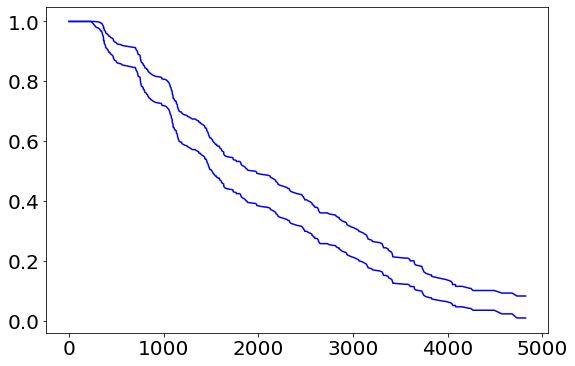

In [15]:
plt.figure(figsize=(9,6))
plt.plot(curver1.timeline[::-1],np.array(kmf1.confidence_interval_survival_function_)[:,0][::-1],color='blue')
plt.plot(curver1.timeline[::-1],np.array(kmf1.confidence_interval_survival_function_)[:,1][::-1],color='blue')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

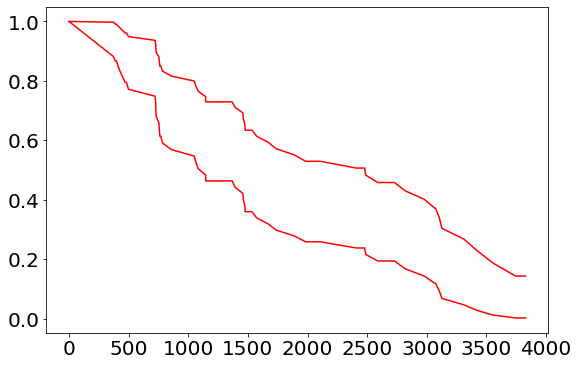

In [16]:
plt.figure(figsize=(9,6))
plt.plot(curver2.timeline[::-1],np.array(kmf2.confidence_interval_survival_function_)[:,0][::-1],color='red')
plt.plot(curver2.timeline[::-1],np.array(kmf2.confidence_interval_survival_function_)[:,1][::-1],color='red')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [17]:
from lifelines.statistics import logrank_test

results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

results.print_summary()
print("p-value:", results.p_value)
print(results.test_statistic)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.70 0.40      1.31

p-value: 0.40359029431028015
0.6976030020718513


In [18]:
print(format(results.p_value,'.3E'))

4.036E-01


In [19]:
print(format(results.test_statistic,'.3E'))

6.976E-01
